In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./Dataset/labeled_data.csv")

In [4]:
df.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
10620,10900,3,0,3,0,1,I know I talk a lot of shit but bitch best bel...
24513,25020,3,1,2,0,1,the devils been sending his workers to get at ...
21084,21537,3,0,2,1,1,"Sometimes I wake up on the ceiling , the floor..."
21506,21968,3,0,0,3,2,The Rick Scott/Charlie Crist ads have been run...
1163,1189,3,0,3,0,1,&#8220;@Caiivs: On some real shit if I catch t...


In [5]:
df.shape

(24783, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
df = df[['tweet' , 'class']]

In [8]:
df

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",2
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


In [9]:
df.isnull().sum()

tweet    0
class    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(24783, 2)

In [12]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

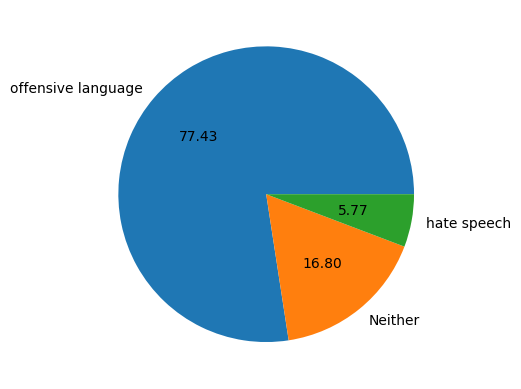

In [13]:
import matplotlib.pyplot as plt

plt.pie(
    df["class"].value_counts(),
    labels=["offensive language", "Neither", "hate speech"],
    autopct="%0.2f",
)
plt.show()

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [16]:
df["num_characters"] = df["tweet"].apply(len)

In [17]:
df["num_words"] = df["tweet"].apply(lambda x: len(nltk.word_tokenize(x)))

In [18]:
df["num_sentences"] = df["tweet"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [19]:
df[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,24783.000000,24783.000000,24783.000000
mean,85.436065,19.950974,1.396845
std,41.548238,11.849239,0.782960
min,5.000000,1.000000,1.000000
25%,52.000000,11.000000,1.000000
50%,81.000000,18.000000,1.000000
75%,119.000000,27.000000,2.000000
max,754.000000,321.000000,42.000000


In [20]:
df[df["class"] == 0][["num_characters", "num_words", "num_sentences"]].describe()


,num_characters,num_words,num_sentences
count,1430.000000,1430.000000,1430.000000
mean,84.586713,18.623077,1.445455
std,40.513212,10.079385,0.764524
min,5.000000,1.000000,1.000000
25%,49.000000,10.000000,1.000000
50%,82.000000,18.000000,1.000000
75%,121.000000,26.000000,2.000000
max,254.000000,92.000000,6.000000


In [21]:
df[df["class"] == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,19190.000000,19190.000000,19190.000000
mean,83.457113,19.818708,1.354143
std,41.453747,12.143518,0.707650
min,5.000000,1.000000,1.000000
25%,50.000000,11.000000,1.000000
50%,78.000000,18.000000,1.000000
75%,115.000000,27.000000,2.000000
max,754.000000,321.000000,17.000000


In [22]:
df[df["class"] == 2][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4163.000000,4163.000000,4163.000000
mean,94.850108,21.016815,1.576988
std,41.054325,10.928020,1.048336
min,7.000000,1.000000,1.000000
25%,60.000000,13.000000,1.000000
50%,97.000000,21.000000,1.000000
75%,132.000000,28.000000,2.000000
max,522.000000,274.000000,42.000000


In [23]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

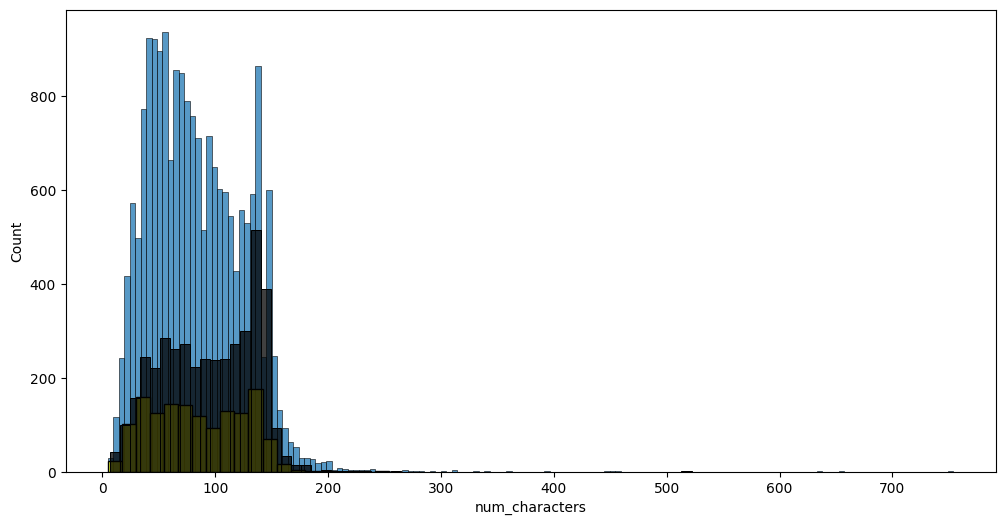

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df["class"] == 1]["num_characters"])
sns.histplot(df[df["class"] == 0]["num_characters"], color="yellow")
sns.histplot(df[df["class"] == 2]["num_characters"], color="black")

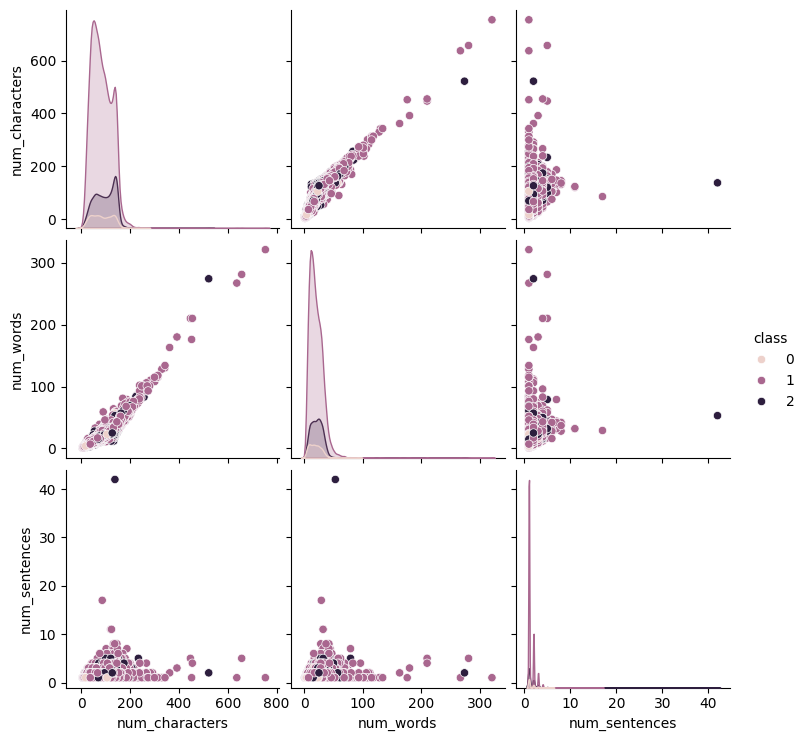

In [25]:
sns.pairplot(df , hue='class')

<Axes: >

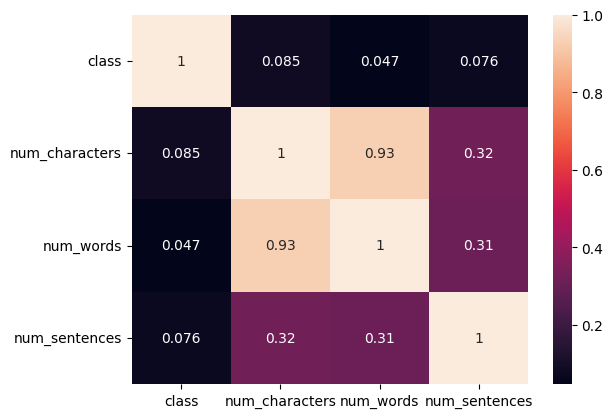

In [26]:
my_df = df.select_dtypes(exclude=[object])
sns.heatmap(my_df.corr(), annot=True)

In [27]:

from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

import string

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)                    

In [30]:
df["transform_tweet"] =  df["tweet"].apply(transform_text)

In [31]:
df.sample()

,tweet,class,num_characters,num_words,num_sentences,transform_tweet
827,#boom bitches,1,13,3,1,boom bitch


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

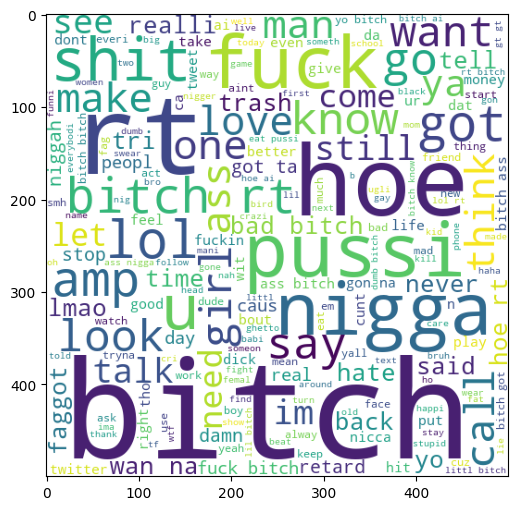

In [33]:
hate_wc = wc.generate(df[df["class"] == 1]["transform_tweet"].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(hate_wc)

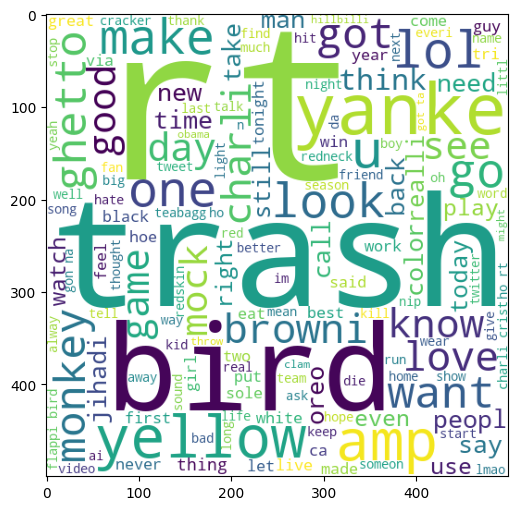

In [34]:
hate_wc = wc.generate(df[df["class"] == 2]["transform_tweet"].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(hate_wc)

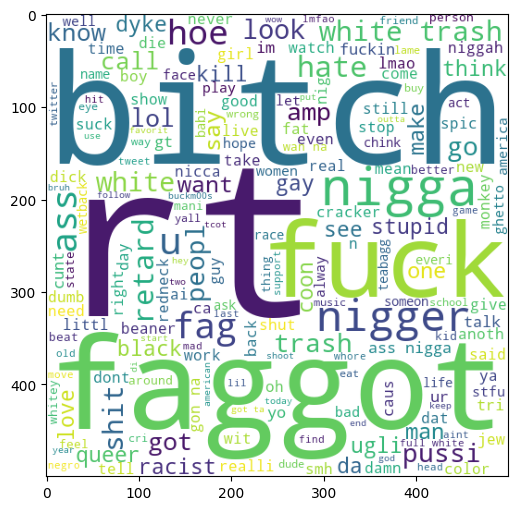

In [35]:
hate_wc = wc.generate(df[df["class"] == 0]["transform_tweet"].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(hate_wc)

In [36]:
df.head()

,tweet,class,num_characters,num_words,num_sentences,transform_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,2,140,34,4,rt mayasolov woman complain clean hous amp man...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,85,26,4,rt mleew17 boy dat cold tyga dwn bad cuffin da...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,120,35,5,rt urkindofbrand dawg rt 80sbaby4lif ever fuck...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,62,20,3,rt look like tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,137,43,3,rt shenikarobert shit hear might true might fa...


In [59]:
hate_corpus = []
for msg in df[df["class"] == 0]["transform_tweet"].tolist():
    for word in msg.split():
        hate_corpus.append(word)

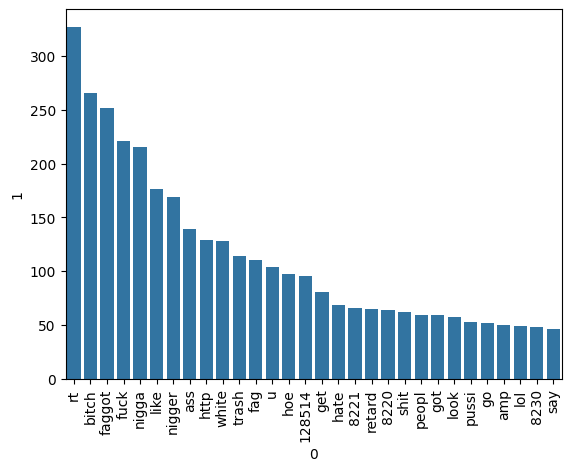

In [60]:
from collections import Counter

sns.barplot(
    x = pd.DataFrame(Counter(hate_corpus).most_common(30))[0],
    y = pd.DataFrame(Counter(hate_corpus).most_common(30))[1]
)
plt.xticks(rotation="vertical")
plt.show()

In [69]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [70]:
X = cv.fit_transform(df['transform_tweet']).toarray()

In [71]:
y = df['class'].values

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

In [75]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

MemoryError: Unable to allocate 3.68 GiB for an array with shape (19826, 24883) and data type float64